In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

from matplotlib.collections import LineCollection


In [2]:
df_sales = pd.read_csv('../data/sales_train_v2.csv')

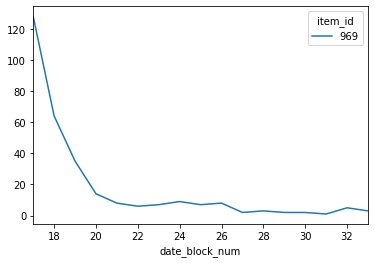

In [3]:
df_sales_shop_id = df_sales.loc[(df_sales['item_cnt_day']>0)&
                                (df_sales['item_id']==969)]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id.unstack(level=1).plot()

In [4]:
df_sales_shop_id

date_block_num  item_id
17              969        128.0
18              969         64.0
19              969         35.0
20              969         14.0
21              969          8.0
22              969          6.0
23              969          7.0
24              969          9.0
25              969          7.0
26              969          8.0
27              969          2.0
28              969          3.0
29              969          2.0
30              969          2.0
31              969          1.0
32              969          5.0
33              969          3.0
Name: item_cnt_day, dtype: float64

In [5]:
#train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
df_sales_shop_id = df_sales.loc[(df_sales['item_cnt_day']>0)&
                                (df_sales['item_id']==969) &
                               (df_sales['date_block_num']<30)]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum().reset_index(name='item_cnt_month')
df_sales_shop_id.drop(['item_id'], axis=1)


,date_block_num,item_cnt_month
0,17,128.0
1,18,64.0
2,19,35.0
3,20,14.0
4,21,8.0
5,22,6.0
6,23,7.0
7,24,9.0
8,25,7.0
9,26,8.0


In [6]:
X = np.array(df_sales_shop_id['date_block_num'])
X


array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [7]:
Y = np.array(df_sales_shop_id['item_cnt_month'])
Y

array([128.,  64.,  35.,  14.,   8.,   6.,   7.,   9.,   7.,   8.,   2.,
         3.,   2.])

In [8]:
Y = -Y

In [9]:
ir = IsotonicRegression(out_of_bounds = 'clip')
Y_ = ir.fit_transform(X, Y)

lr = LinearRegression()
lr.fit(X[:, np.newaxis], Y)  # x needs to be 2d for LinearRegression



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<Figure size 432x288 with 0 Axes>

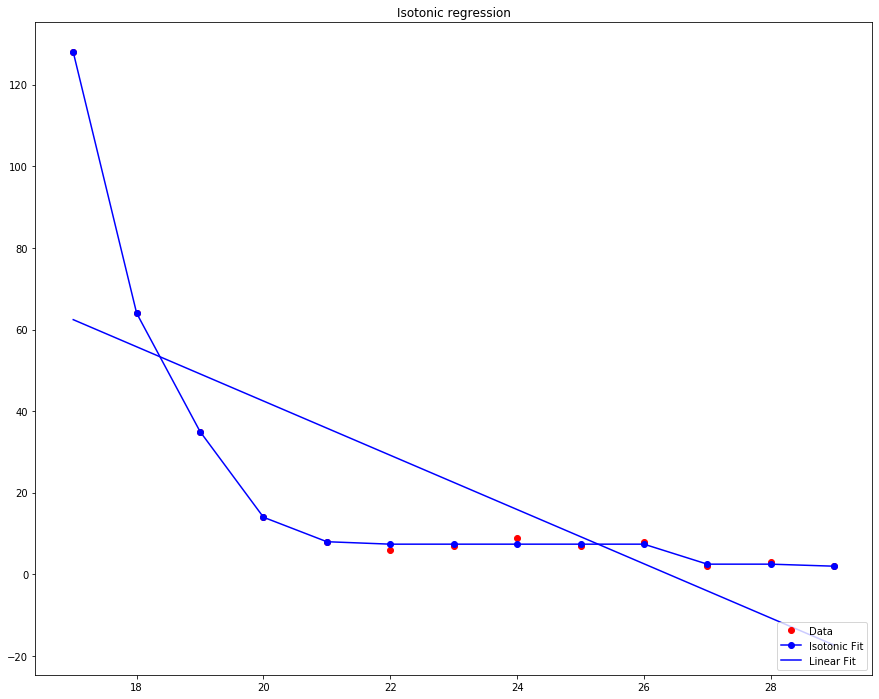

In [10]:
# for plotting

segments = [[[i, Y[i]], [i, Y_[i]]] for i in range(len(X))]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(Y)))
lc.set_linewidths(np.full(len(X), 0.5))

fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,12))
plt.plot( X, -Y, 'r.', markersize=12)
plt.plot( X, -Y_, 'b.-', markersize=12)
plt.plot(X, -lr.predict(X[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

In [14]:
x= np.arange(0)
x[17:34, np.newaxis]

array([], shape=(0, 1), dtype=int64)

In [15]:
# create np array with the month we want to predict
X_test =   np.arange(34)
X_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [16]:
predicted_values = ir.predict(X_test) 
-predicted_values

array([128. , 128. , 128. , 128. , 128. , 128. , 128. , 128. , 128. ,
       128. , 128. , 128. , 128. , 128. , 128. , 128. , 128. , 128. ,
        64. ,  35. ,  14. ,   8. ,   7.4,   7.4,   7.4,   7.4,   7.4,
         2.5,   2.5,   2. ,   2. ,   2. ,   2. ,   2. ])

In [17]:
# from here
# https://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html#sphx-glr-auto-examples-plot-isotonic-regression-py
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))
ir = IsotonicRegression()
#lm.fit(x,y)
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

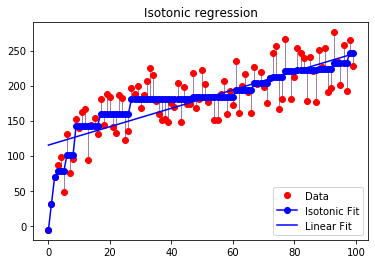

In [18]:
# for plotting
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'b.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()